# Part 1 ‑ Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
import json
from pandas.io.json import json_normalize

In [2]:
# load as Pandas dataframe
logins_df = pd.read_json('logins.json')

logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
login_15min_summary = pd.DataFrame(logins_df.resample('15T').sum()) 
logins_df = pd.read_json('logins.json')
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
login_Daily_summary = pd.DataFrame(logins_df.resample('D').sum()) 
login_15min_summary.head(),login_Daily_summary.head()

(                     count
 login_time                
 1970-01-01 20:00:00      2
 1970-01-01 20:15:00      6
 1970-01-01 20:30:00      9
 1970-01-01 20:45:00      7
 1970-01-01 21:00:00      1,             count
 login_time       
 1970-01-01    112
 1970-01-02    681
 1970-01-03    793
 1970-01-04    788
 1970-01-05    459)

In [4]:
login_15min_summary.rename(columns={ login_15min_summary.columns[0]: "Count" }, inplace = True)
login_Daily_summary.rename(columns={ login_Daily_summary.columns[0]: "Count" }, inplace = True)

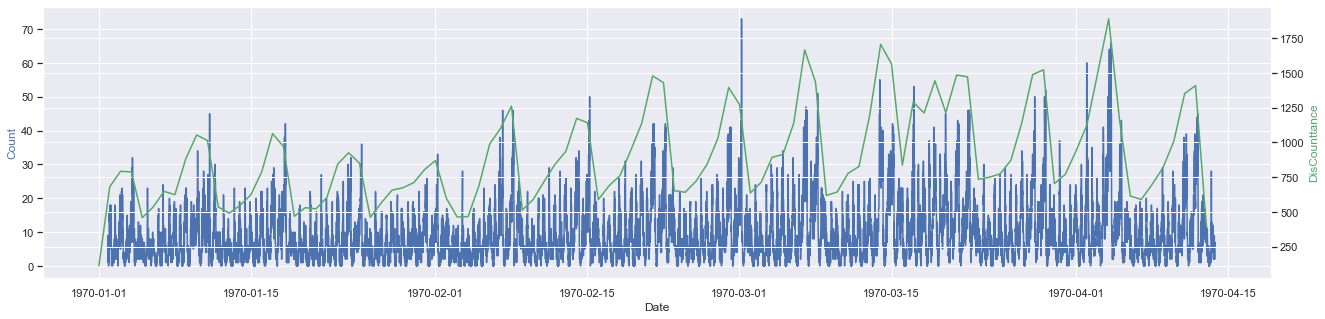

In [6]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(login_15min_summary.index, login_15min_summary['Count'], 'b-')
ax2.plot(login_Daily_summary.index, login_Daily_summary['Count'], 'g-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Count', color='b')
ax2.set_ylabel('DisCounttance', color='g')

plt.show()
plt.rcParams['figure.figsize'] = 22,5

**It is hard to see at this scale. Steps need to be taken to better understand the data.**

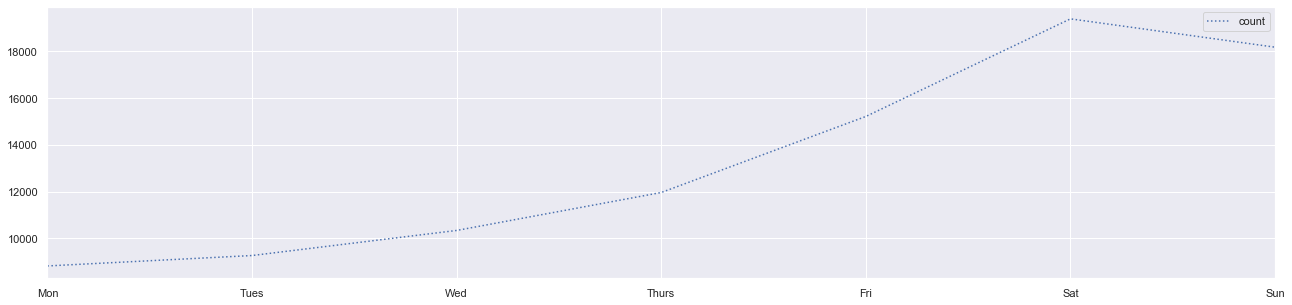

In [15]:
by_weekday = logins_df.groupby(logins_df.index.dayofweek).count()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

**The above graph makes it clear that Saturday has the most logins, and that the weekends are busier than the weekdays.**

C:\Users\Amin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Amin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


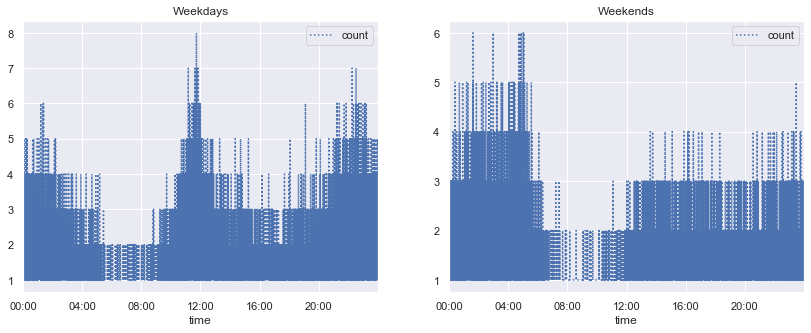

In [21]:
weekend = np.where(logins_df.index.weekday < 5, 'Weekday', 'Weekend')
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time = logins_df.groupby([weekend, logins_df.index.time]).count()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':']);

**The result shows the heaviest usage occurs during the early hours (12 AM - 5 AM) on Saturday. During the weekdays there are smaller spikes in usage during lunch hours (11 am to noon), and in the evening (9 PM - 11 PM).**

# Part 2 ‑ Experiment and metrics design


I assume, we have record of the number of cars that use the bridge.

The key metric I would use is change in weekday activity. Specifically, during the daytime hours on weekdays, is there an increase of cars entering the bridge from Gotham and during the night is there an increase of cars entering the bridge from Metropolis.

I would use two hypothesis tests.
------------------------------------------------------------------------------------------------------------------------------
H0: There is no difference between the mean number of cars entering the bridge from Gotham during days on weekday before reimbursements were offered and the number of cars after reimbursements were offered.

H2: There is an INCREASE in the mean number of cars entering the bridge from Gotham during days on weekday before reimbursements were offered and the mean number of cars after reimbursements were offered.

-----------------------------------------------------------------------------------------------------------------

H0: There is no difference between the mean number of cars entering the bridge from Metropolis during night on weekday before reimbursements were offered and the mean number of cars two weeks after reimbursements were offered.

H2: There is an INCREASE in the mean number of cars entering the bridge from Metropolis during night on weekday before reimbursements were offered and the mean number of cars after reimbursements were offered.

---------------------------------------------------------------------------------------------------------------------

I would use a Z-test to determine the p-value of each hypothesis.

If the p-value is less than 0.05 for BOTH tests I would reject the null hypotheses and recommend the reimbursement program continue.

If the p-value is greater than 0.05 for BOTH tests I would fail to reject the null hypotheses and recommend that a different program be developed to increase partner driving between the two cities.


# Part 3 ‑ Predictive modeling

In [34]:
openfile=open('ultimate_data_challenge.json')
jsondata=json.load(openfile)
ultimate_df=pd.DataFrame(jsondata)
openfile.close()

ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


**Cleaning**

In [35]:
ultimate_df.isnull().values.any()  

True

In [36]:
ultimate_df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [37]:
ultimate_df.drop(['avg_rating_by_driver','avg_rating_of_driver','phone'], axis=1).isnull().values.any()  

False

In [38]:
ultimate_df.phone = ultimate_df.phone.fillna(0)
ultimate_df.avg_rating_by_driver = ultimate_df.avg_rating_by_driver.fillna(method='ffill')
ultimate_df.avg_rating_of_driver = ultimate_df.avg_rating_of_driver.fillna(method='ffill')

In [39]:
ultimate_df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [47]:
ultimate_df['last_trip_date'].max()

'2014-07-01'

In [110]:
(pd.to_datetime(ultimate_df['last_trip_date'].max()) - pd.to_datetime(ultimate_df['last_trip_date'])).head()

0    14 days
1    57 days
2   175 days
3     2 days
4   108 days
Name: last_trip_date, dtype: timedelta64[ns]

In [147]:
#di = (pd.to_datetime(ultimate_df['last_trip_date'].max()) - pd.to_datetime(ultimate_df['last_trip_date']))
ultimate_df.last_trip_date = ultimate_df.last_trip_date.apply(pd.to_datetime)
diff = (ultimate_df['last_trip_date'].max() - ultimate_df['last_trip_date']).dt.days
ultimate_df['retained'] = diff.apply(lambda x: 'Yes' if x <=30 else 'No') 

In [148]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,Yes
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,No
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,No
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,Yes
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,No


In [149]:
source = ultimate_df.drop(['retained'],axis=1)
source.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [152]:
target = ultimate_df.retained
target.unique()

array(['Yes', 'No'], dtype=object)

In [200]:
target.value_counts()

No     31196
Yes    18804
Name: retained, dtype: int64

In [202]:
print('{} percent of users were retained.'.format(target.value_counts()[1]/(target.value_counts()[0]+target.value_counts()[1])))

0.37608 percent of users were retained.


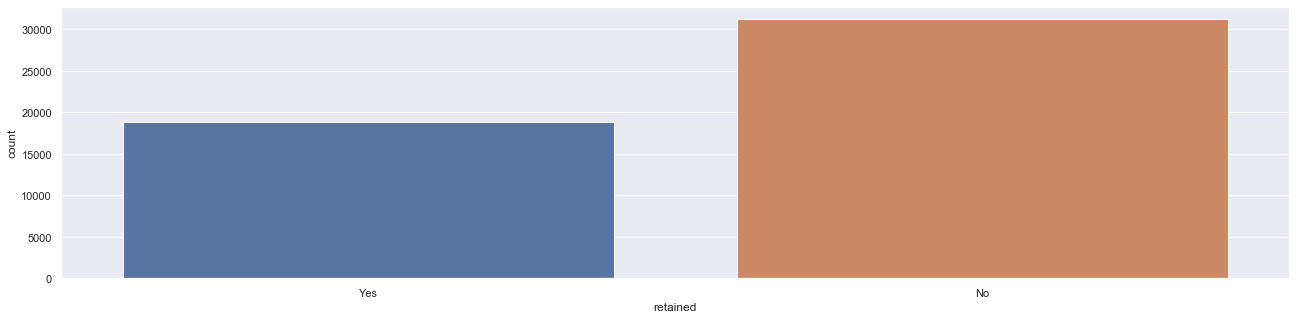

In [154]:
import seaborn as sns
ax = sns.countplot(target,label="Count")       
Y, N = target.value_counts()

In [121]:
# standardization
sourc_1 = source.drop(['city','last_trip_date','phone','signup_date','ultimate_black_user'],axis=1)
source_s = (sourc_1 - sourc_1.mean()) / (sourc_1.std()) 
source_s.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
0,-0.372647,0.496721,0.162384,0.113505,0.328199,0.453979,-0.397127
1,0.431579,0.496721,0.647662,-0.336265,-0.443390,-0.600683,-0.294651
2,-0.880763,0.496721,-0.484654,-0.336265,-0.443390,0.190314,1.053731
3,-0.602175,0.272771,0.000624,0.293413,0.558674,1.772307,0.514378
4,-0.467261,0.272771,-0.322895,0.518298,0.147828,3.090634,0.579100


In [130]:
data = pd.concat([target,source_s],axis=1)
#data.head()
data = pd.melt(data,id_vars="retained",
                    var_name="features",
                    value_name='value')
data.head()

,retained,features,value
0,Yes,avg_dist,-0.372647
1,No,avg_dist,0.431579
2,No,avg_dist,-0.880763
3,Yes,avg_dist,-0.602175
4,No,avg_dist,-0.467261


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

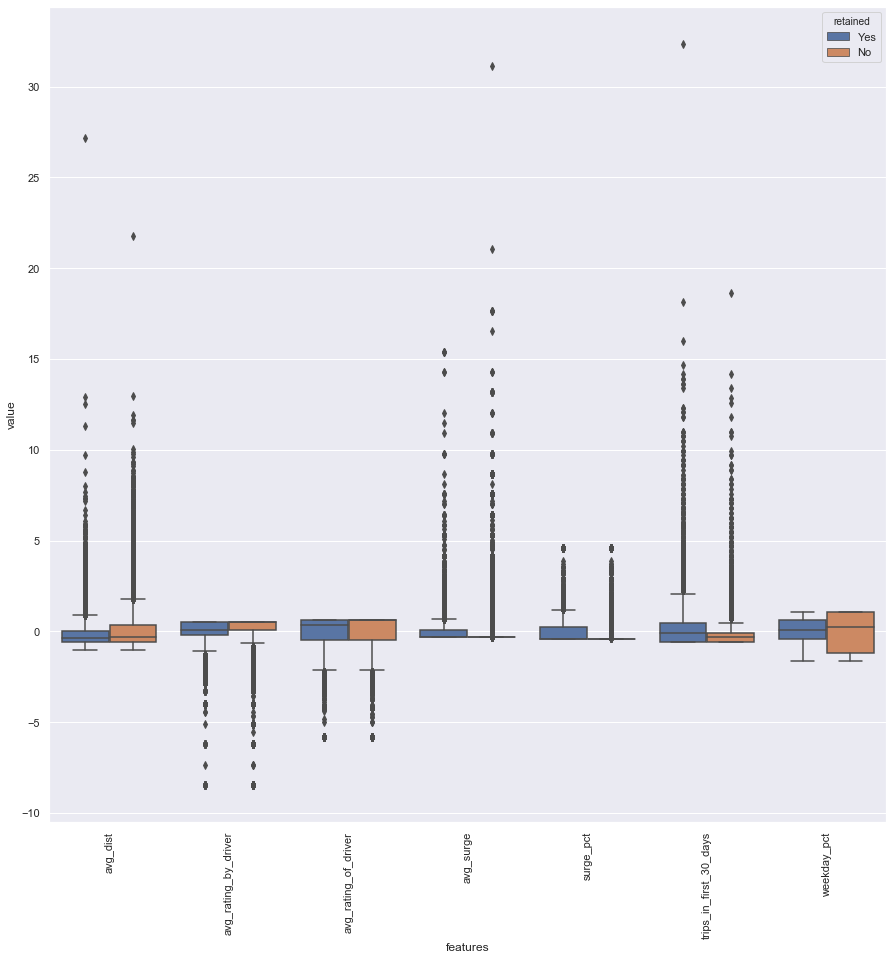

In [132]:
import matplotlib.pyplot as plt

# box plots are also useful in terms of seeing outliers

plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="retained", data=data)
plt.xticks(rotation=90)

**here is not a big difference between the average of the features for retained and inactive users.**

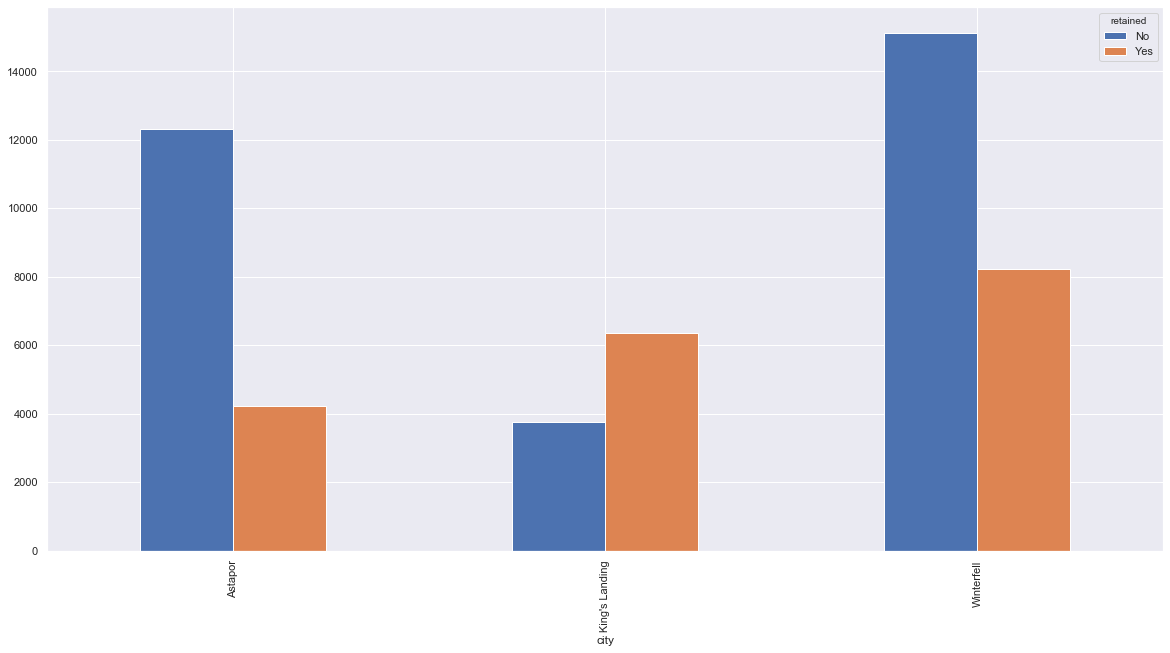

In [169]:
ultimate_retained_city_df = ultimate_df.groupby(['city','retained'])['retained']
ultimate_retained_city_df = ultimate_retained_city_df.agg({'count'})

dist_ultimate_retained_city_df = ultimate_retained_city_df.reset_index()
dist_ultimate_retained_city_df = dist_ultimate_retained_city_df.pivot_table(index='city',columns='retained',values='count')
dist_ultimate_retained_city_df.plot.bar(figsize=(20,10)) 


# Find importance of features with Random Forest

In [170]:
import matplotlib.ticker as mtick
from sklearn import ensemble
from sklearn.model_selection import train_test_split , RandomizedSearchCV , StratifiedShuffleSplit
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [173]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null object
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [174]:
ultimate_df.select_dtypes(include=['object']).columns

Index(['city', 'phone', 'signup_date', 'retained'], dtype='object')

In [176]:
# Object data to category
for col in ultimate_df.select_dtypes(include=['object']).columns:
    ultimate_df[col] = ultimate_df[col].astype('category')
    
# Encoding categorical features
for col in ultimate_df.select_dtypes(include=['category']).columns:
    ultimate_df[col] = ultimate_df[col].cat.codes

In [182]:
model = ensemble.RandomForestClassifier(n_estimators=250,class_weight='balanced', max_depth=25)
model.fit(ultimate_df[ultimate_df.columns[(ultimate_df.columns != 'retained') & 
                                          (ultimate_df.columns != 'signup_date') &
                                          (ultimate_df.columns != 'last_trip_date')]], ultimate_df.retained)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=250, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [185]:
df_plot = pd.DataFrame({'features': ultimate_df.columns[(ultimate_df.columns != 'retained') & 
                                          (ultimate_df.columns != 'signup_date') &
                                          (ultimate_df.columns != 'last_trip_date')],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

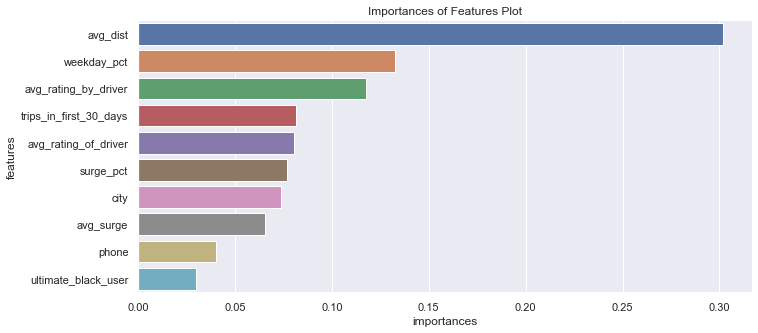

In [186]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

**The factors that most heavily influence rider retention are the average distance in miles per trip taken in the first 30 days after signup and the percent of the user's trips occuring during a weekday.**

# Feature Selection with Variance Inflation Factor (VIF)

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [189]:
from sklearn.preprocessing import Imputer

transformer = ReduceVIF()

# Only use 10 columns for speed in this example
df_informative_VIF = transformer.fit_transform(ultimate_df[ultimate_df.columns[(ultimate_df.columns != 'retained') & 
                                          (ultimate_df.columns != 'signup_date') &
                                          (ultimate_df.columns != 'last_trip_date')]], target)

df_informative_VIF.head()

C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ReduceVIF fit
ReduceVIF transform
Dropping avg_rating_by_driver with vif=66.35034370044876
Dropping avg_surge with vif=38.05199621527618
Dropping avg_rating_of_driver with vif=14.343212647082913
Dropping phone with vif=5.214726330910371


,avg_dist,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,1.0,15.4,4.0,1.0,46.2
1,8.26,0.0,0.0,0.0,0.0,50.0
2,0.77,0.0,0.0,3.0,0.0,100.0
3,2.36,1.0,20.0,9.0,1.0,80.0
4,3.13,2.0,11.8,14.0,0.0,82.4


# Split data on balanced training set and test set

In [190]:
# Train & Test split VIF
train_data_VIF, test_data_VIF, train_labels_VIF, test_labels_VIF = train_test_split(df_informative_VIF, target, test_size = 0.3, random_state=0, stratify=target)

**XGBoost is appropriate for the binary classification problem and it's fast and memory efficient.**

# XGboost

In [192]:
# Create model

model = xgb.XGBClassifier()

# Create parameters grid

parameters_grid = { 'learning_rate' : [0.1, 0.2, 0.5], 'max_depth' : [5, 10, 15], 'n_estimators' : [150, 250, 300], 'min_child_weight' : [3, 5, 10] }

# Strategy of cross validation

cv = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3)

# Create Grid search Strategy

grid_cv = RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)

# Fit model by Grid

grid_cv.fit(train_data_VIF, train_labels_VIF)

# Model with the best estimator

grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [193]:
model_VIF = xgb.XGBClassifier(learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=250)

In [194]:
# with VIF features
model_VIF.fit(train_data_VIF, train_labels_VIF)
# Predicting
predict_labels_VIF = model_VIF.predict(test_data_VIF)

# The results of the XGBoost algorithm with VIF feature selection

In [195]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_VIF, predict_labels_VIF))

              precision    recall  f1-score   support

          No       0.80      0.85      0.82      9359
         Yes       0.72      0.64      0.68      5641

    accuracy                           0.77     15000
   macro avg       0.76      0.74      0.75     15000
weighted avg       0.77      0.77      0.77     15000



In [196]:
ac = accuracy_score(test_labels_VIF,model_VIF.predict(test_data_VIF))
print('Accuracy is: ',ac)

Accuracy is:  0.7698666666666667


**Classification accuracy is 77% for the test data**